# Telepass Insurance Prediction Models
## Model 2: Decision Trees

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve
import warnings
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

## Load Datasets

In [3]:
# Load the datasets
print("Loading datasets...")
# Adjust path relative to the notebook location (inside the models/2-decision-trees directory)
insurance_quotes = pd.read_csv('../../data/insurance_quotes.csv', sep=';')
transactions = pd.read_csv('../../data/transactions.csv', sep=';')

# Display basic information about the datasets
print("Insurance Quotes Dataset:")
print("Shape: {}".format(insurance_quotes.shape))
display(insurance_quotes.head()) # Use display for notebooks

print("Transactions Dataset:")
print("Shape: {}".format(transactions.shape))
display(transactions.head()) # Use display for notebooks

Loading datasets...
Insurance Quotes Dataset:
Shape: (36173, 40)


,client_id,quotation_id,driving_type,car_immatriculation_date,car_brand,car_model,insurance_expires_at,birth_date,gender,county,base_subscription,base_type,pay_subscription,pay_cancellation,premium_subscription,premium_cancellation,operating_system,policy_quoted_at,broker_id,issued,guarantees_purchased,guarantees_available,roadside_assistance,driver_injury,basic_coverage,legal_protection,waive_right_compensation,uninsured_vehicles,protected_bonus,windows,natural_events,theft_fire,kasko,license_revoked,collision,vandalism,key_loss,price_sale,price_full,discount_percent
0,23789,3649,more_than_26,20.7.2011,FORD,C-MAX,12.6.2020,NaN,NaN,FC,24.6.2019,FA,NaN,NaN,11.6.2020,31.12.9998,and,15.3.2020,1,False,NaN,Assistenza Stradale - Collisione - Cristalli -...,1,"37,5","325,48","28,33","25,3",NaN,NaN,"68,1",NaN,"22,7",NaN,NaN,"121,83",NaN,NaN,"325,48","325,48",0
1,10133,28552,more_than_26,1.3.2007,FIAT - INNOCENTI,FIAT CROMA,22.1.2020,NaN,NaN,MS,12.11.2012,FA,NaN,NaN,29.12.2014,31.12.9998,and,8.1.2020,1,False,NaN,Assistenza Stradale - Bonus Protetto - Collisi...,1,"33,73","271,25","24,43","11,92",NaN,"37,04","34,42",NaN,"22,7",NaN,NaN,"89,99",NaN,NaN,"271,25","306,8","0,115873533"
2,20785,31958,more_than_26,30.8.2017,NISSAN,NISSAN QASHQAI,2.10.2020,22.9.1992,M,SA,26.8.2019,FA,26.8.2019,31.12.9998,NaN,NaN,and,29.4.2020,1,False,NaN,Assistenza Stradale - Infortuni del Conducente...,1,"36,25","640,84","29,5","25,3",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"640,84","684,01","0,063113112"
3,33892,27614,more_than_26,25.7.2017,FIAT - INNOCENTI,FIAT PANDA,25.7.2020,9.2.1996,M,NaN,12.9.2017,FA,NaN,NaN,13.9.2017,31.12.9998,and,17.3.2020,2,False,NaN,Assistenza Stradale - RCA,1,NaN,"2185,38",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"2185,38","2204,87","0,008839523"
4,34153,1529,more_than_26,19.12.2006,FIAT - INNOCENTI,FIAT PUNTO,13.10.2020,8.1.2000,M,CN,29.8.2019,FA,NaN,NaN,NaN,NaN,ios,9.2.2020,1,False,NaN,Assistenza Stradale - Bonus Protetto - Collisi...,1,"39,13","207,68","24,72","25,3",NaN,"25,45","36,36",NaN,"24,34",NaN,NaN,"156,11",NaN,NaN,"207,68","231,2","0,101730104"


Transactions Dataset:
Shape: (49707, 6)


,client_id,year_month,service_type,telepass_pay,number_transactions,expenditures
0,20785,May.20,PARCHEGGI/TRAGHETTI,0,1,2
1,20785,Sep.19,PARCHEGGI/TRAGHETTI,0,1,2
2,34153,Feb.20,PARCHEGGI/TRAGHETTI,0,1,"3,75"
3,21141,Jan.20,PARCHEGGI/TRAGHETTI,0,1,"3,5"
4,21141,Feb.20,PARCHEGGI/TRAGHETTI,0,1,7


## Check Missing Values

In [4]:
# Check for missing values
print("Missing values in Insurance Quotes Dataset:")
print(insurance_quotes.isnull().sum())

print("Missing values in Transactions Dataset:")
print(transactions.isnull().sum())

Missing values in Insurance Quotes Dataset:
client_id                       0
quotation_id                    0
driving_type                    0
car_immatriculation_date     1710
car_brand                       0
car_model                       0
insurance_expires_at           45
birth_date                  13643
gender                      13581
county                       2827
base_subscription               0
base_type                       0
pay_subscription            26047
pay_cancellation            26047
premium_subscription        13042
premium_cancellation        13042
operating_system             1326
policy_quoted_at                0
broker_id                       0
issued                          0
guarantees_purchased        26059
guarantees_available            0
roadside_assistance             0
driver_injury                 743
basic_coverage                  0
legal_protection              762
waive_right_compensation    15288
uninsured_vehicles          33025
prot

## Preprocessing Functions

In [5]:
# Define a function to preprocess the insurance quotes dataset
def preprocess_insurance_quotes(df):
    """
    Preprocess the insurance quotes dataset for modeling.
    """
    # Make a copy of the dataframe
    df_processed = df.copy()
    
    # Convert categorical variables to appropriate types
    
    # Handle date columns
    date_columns = ['car_immatriculation_date', 'insurance_expires_at', 'birth_date', 
                   'base_subscription', 'pay_subscription', 'pay_cancellation',
                   'premium_subscription', 'premium_cancellation', 'policy_quoted_at']
    
    for col in date_columns:
        if col in df_processed.columns:
            try:
                df_processed[col] = pd.to_datetime(df_processed[col], errors='coerce')
            except:
                print("Could not convert {} to datetime.".format(col))
    
    # Handle the target variable - properly convert 'TRUE'/'FALSE' to 1/0
    if 'issued' in df_processed.columns:
        df_processed['issued'] = df_processed['issued'].map({True: 1, 'TRUE': 1, False: 0, 'FALSE': 0})
    
    # Convert numeric columns with comma separators
    numeric_columns = ['driver_injury', 'basic_coverage', 'legal_protection', 
                       'waive_right_compensation', 'uninsured_vehicles', 
                       'protected_bonus', 'windows', 'natural_events', 
                       'theft_fire', 'kasko', 'license_revoked', 
                       'collision', 'vandalism', 'key_loss', 
                       'price_sale', 'price_full', 'discount_percent']
    
    for col in numeric_columns:
        if col in df_processed.columns:
            df_processed[col] = df_processed[col].astype(str).str.replace(',', '.').astype(float, errors='ignore')
    
    # Create derived features
    # Calculate age at policy quote time
    if 'birth_date' in df_processed.columns and 'policy_quoted_at' in df_processed.columns:
        mask = ~df_processed['birth_date'].isna() & ~df_processed['policy_quoted_at'].isna()
        df_processed.loc[mask, 'age'] = (df_processed.loc[mask, 'policy_quoted_at'] - 
                                         df_processed.loc[mask, 'birth_date']).dt.days / 365.25
    
    # Calculate car age at policy quote time
    if 'car_immatriculation_date' in df_processed.columns and 'policy_quoted_at' in df_processed.columns:
        mask = ~df_processed['car_immatriculation_date'].isna() & ~df_processed['policy_quoted_at'].isna()
        df_processed.loc[mask, 'car_age'] = (df_processed.loc[mask, 'policy_quoted_at'] - 
                                            df_processed['car_immatriculation_date']).dt.days / 365.25
    
    # Telepass membership duration
    if 'base_subscription' in df_processed.columns and 'policy_quoted_at' in df_processed.columns:
        mask = ~df_processed['base_subscription'].isna() & ~df_processed['policy_quoted_at'].isna()
        df_processed.loc[mask, 'telepass_membership_years'] = (df_processed.loc[mask, 'policy_quoted_at'] - 
                                                             df_processed['base_subscription']).dt.days / 365.25
    
    # Flag customers with TelepassPay
    if 'pay_subscription' in df_processed.columns and 'pay_cancellation' in df_processed.columns:
        df_processed['has_telepass_pay'] = 0
        # If they have a pay_subscription but no cancellation or cancellation is far in the future
        mask = (~df_processed['pay_subscription'].isna() & 
                (df_processed['pay_cancellation'].isna() | 
                 (df_processed['pay_cancellation'] > pd.to_datetime('2025-01-01'))))
        df_processed.loc[mask, 'has_telepass_pay'] = 1
    
    # Flag customers with Telepass Premium
    if 'premium_subscription' in df_processed.columns and 'premium_cancellation' in df_processed.columns:
        df_processed['has_telepass_premium'] = 0
        # If they have a premium_subscription but no cancellation or cancellation is far in the future
        mask = (~df_processed['premium_subscription'].isna() & 
                (df_processed['premium_cancellation'].isna() | 
                 (df_processed['premium_cancellation'] > pd.to_datetime('2025-01-01'))))
        df_processed.loc[mask, 'has_telepass_premium'] = 1
    
    # Count available guarantees
    if 'guarantees_available' in df_processed.columns:
        df_processed['num_guarantees_available'] = df_processed['guarantees_available'].str.count('-') + 1
    
    return df_processed

# Define a function to preprocess the transactions dataset
def preprocess_transactions(df):
    """
    Preprocess the transactions dataset for modeling.
    """
    # Make a copy of the dataframe
    df_processed = df.copy()
    
    # Convert year_month to datetime
    if 'year_month' in df_processed.columns:
        try:
            df_processed['year_month'] = pd.to_datetime(df_processed['year_month'], format='%b.%y', errors='coerce')
        except:
            print("Could not convert year_month to datetime.")
    
    # Handle numerical values
    if 'expenditures' in df_processed.columns:
        df_processed['expenditures'] = df_processed['expenditures'].astype(str).str.replace(',', '.').astype(float)
    
    return df_processed

# Function to create aggregate features per client from transactions
def create_transaction_features(df):
    """
    Aggregate transaction data to create features at the client level.
    """
    # Calculate total transactions and expenditures per client
    client_stats = df.groupby('client_id').agg(
        total_transactions=('number_transactions', 'sum'),
        total_expenditures=('expenditures', 'sum'),
        avg_expenditure_per_transaction=('expenditures', lambda x: x.sum() / df.loc[x.index, 'number_transactions'].sum() if df.loc[x.index, 'number_transactions'].sum() > 0 else 0),
        num_months_active=('year_month', 'nunique'),
        num_service_types=('service_type', 'nunique')
    )
    
    # Calculate statistics for telepass_pay transactions
    telepass_pay_stats = df[df['telepass_pay'] == 1].groupby('client_id').agg(
        telepass_pay_transactions=('number_transactions', 'sum'),
        telepass_pay_expenditures=('expenditures', 'sum')
    )
    
    # Merge all features
    client_features = client_stats.copy()
    client_features = client_features.join(telepass_pay_stats, how='left')
    
    # Fill NaN values for clients without telepass_pay transactions
    client_features['telepass_pay_transactions'] = client_features['telepass_pay_transactions'].fillna(0)
    client_features['telepass_pay_expenditures'] = client_features['telepass_pay_expenditures'].fillna(0)
    
    # Calculate percentage of telepass_pay transactions
    client_features['telepass_pay_pct'] = client_features.apply(
        lambda row: row['telepass_pay_transactions'] / row['total_transactions'] if row['total_transactions'] > 0 else 0, 
        axis=1
    )
    client_features['telepass_pay_expenditures_pct'] = client_features.apply(
        lambda row: row['telepass_pay_expenditures'] / row['total_expenditures'] if row['total_expenditures'] > 0 else 0, 
        axis=1
    )
    
    # Handle division by zero edge cases not covered above (though apply should handle it)
    client_features.replace([np.inf, -np.inf], 0, inplace=True)
    client_features.fillna(0, inplace=True)
    
    # Reset index to make client_id a column
    client_features.reset_index(inplace=True)
    
    return client_features

## Apply Preprocessing and Feature Engineering

In [6]:
# Preprocess the datasets
print("Preprocessing datasets...")
insurance_quotes_processed = preprocess_insurance_quotes(insurance_quotes)
transactions_processed = preprocess_transactions(transactions)

# Display the preprocessed datasets
print("Preprocessed Insurance Quotes Dataset:")
display(insurance_quotes_processed.head())

print("Preprocessed Transactions Dataset:")
display(transactions_processed.head())

Preprocessing datasets...
Preprocessed Insurance Quotes Dataset:


,client_id,quotation_id,driving_type,car_immatriculation_date,car_brand,car_model,insurance_expires_at,birth_date,gender,county,base_subscription,base_type,pay_subscription,pay_cancellation,premium_subscription,premium_cancellation,operating_system,policy_quoted_at,broker_id,issued,guarantees_purchased,guarantees_available,roadside_assistance,driver_injury,basic_coverage,legal_protection,waive_right_compensation,uninsured_vehicles,protected_bonus,windows,natural_events,theft_fire,kasko,license_revoked,collision,vandalism,key_loss,price_sale,price_full,discount_percent,age,car_age,telepass_membership_years,has_telepass_pay,has_telepass_premium,num_guarantees_available
0,23789,3649,more_than_26,2011-07-20,FORD,C-MAX,2020-12-06,NaT,NaN,FC,2019-06-24,FA,NaT,NaT,2020-11-06,NaT,and,2020-03-15,1,0,NaN,Assistenza Stradale - Collisione - Cristalli -...,1,37.50,325.48,28.33,25.30,NaN,NaN,68.10,NaN,22.70,NaN,NaN,121.83,NaN,NaN,325.48,325.48,0.000000,NaN,8.654346,0.725530,0,1,8
1,10133,28552,more_than_26,2007-03-01,FIAT - INNOCENTI,FIAT CROMA,NaT,NaT,NaN,MS,2012-11-12,FA,NaT,NaT,NaT,NaT,and,2020-01-08,1,0,NaN,Assistenza Stradale - Bonus Protetto - Collisi...,1,33.73,271.25,24.43,11.92,NaN,37.04,34.42,NaN,22.70,NaN,NaN,89.99,NaN,NaN,271.25,306.80,0.115874,NaN,12.856947,7.154004,0,0,9
2,20785,31958,more_than_26,2017-08-30,NISSAN,NISSAN QASHQAI,2020-02-10,1992-09-22,M,SA,2019-08-26,FA,2019-08-26,NaT,NaT,NaT,and,2020-04-29,1,0,NaN,Assistenza Stradale - Infortuni del Conducente...,1,36.25,640.84,29.50,25.30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,640.84,684.01,0.063113,27.600274,2.663929,0.676249,1,0,5
3,33892,27614,more_than_26,2017-07-25,FIAT - INNOCENTI,FIAT PANDA,NaT,1996-02-09,M,NaN,2017-09-12,FA,NaT,NaT,NaT,NaT,and,2020-03-17,2,0,NaN,Assistenza Stradale - RCA,1,NaN,2185.38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2185.38,2204.87,0.008840,24.101300,2.644764,2.510609,0,0,2
4,34153,1529,more_than_26,2006-12-19,FIAT - INNOCENTI,FIAT PUNTO,NaT,2000-01-08,M,CN,2019-08-29,FA,NaT,NaT,NaT,NaT,ios,2020-02-09,1,0,NaN,Assistenza Stradale - Bonus Protetto - Collisi...,1,39.13,207.68,24.72,25.30,NaN,25.45,36.36,NaN,24.34,NaN,NaN,156.11,NaN,NaN,207.68,231.20,0.101730,20.087611,13.141684,0.449008,0,0,9


Preprocessed Transactions Dataset:


,client_id,year_month,service_type,telepass_pay,number_transactions,expenditures
0,20785,2020-05-01,PARCHEGGI/TRAGHETTI,0,1,2.00
1,20785,2019-09-01,PARCHEGGI/TRAGHETTI,0,1,2.00
2,34153,2020-02-01,PARCHEGGI/TRAGHETTI,0,1,3.75
3,21141,2020-01-01,PARCHEGGI/TRAGHETTI,0,1,3.50
4,21141,2020-02-01,PARCHEGGI/TRAGHETTI,0,1,7.00


In [7]:
# Create transaction features
print("Creating transaction features...")
transaction_features = create_transaction_features(transactions_processed)
display(transaction_features.head())

Creating transaction features...


,client_id,total_transactions,total_expenditures,avg_expenditure_per_transaction,num_months_active,num_service_types,telepass_pay_transactions,telepass_pay_expenditures,telepass_pay_pct,telepass_pay_expenditures_pct
0,2,2,615.707998,307.853999,2,1,2.0,615.707998,1.0,1.0
1,3,1,4.200000,4.200000,1,1,0.0,0.000000,0.0,0.0
2,5,1,5.000000,5.000000,1,1,1.0,5.000000,1.0,1.0
3,8,5,27.000000,5.400000,3,1,0.0,0.000000,0.0,0.0
4,10,2,24.700000,12.350000,2,1,0.0,0.000000,0.0,0.0


## Merge Datasets

In [8]:
# Merge the datasets
print("Merging datasets...")
merged_data = insurance_quotes_processed.merge(
    transaction_features, 
    on='client_id', 
    how='left'
)

# Fill missing transaction data for clients without transactions
# Re-iterate through the transaction feature columns to fill NaNs introduced by the left merge
transaction_feature_cols = transaction_features.drop(columns=['client_id']).columns
for col in transaction_feature_cols:
    if col in merged_data.columns:
        merged_data[col] = merged_data[col].fillna(0)

print("Shape of merged data: {}".format(merged_data.shape))
display(merged_data.head())

Merging datasets...
Shape of merged data: (36173, 55)


,client_id,quotation_id,driving_type,car_immatriculation_date,car_brand,car_model,insurance_expires_at,birth_date,gender,county,base_subscription,base_type,pay_subscription,pay_cancellation,premium_subscription,premium_cancellation,operating_system,policy_quoted_at,broker_id,issued,guarantees_purchased,guarantees_available,roadside_assistance,driver_injury,basic_coverage,legal_protection,waive_right_compensation,uninsured_vehicles,protected_bonus,windows,natural_events,theft_fire,kasko,license_revoked,collision,vandalism,key_loss,price_sale,price_full,discount_percent,age,car_age,telepass_membership_years,has_telepass_pay,has_telepass_premium,num_guarantees_available,total_transactions,total_expenditures,avg_expenditure_per_transaction,num_months_active,num_service_types,telepass_pay_transactions,telepass_pay_expenditures,telepass_pay_pct,telepass_pay_expenditures_pct
0,23789,3649,more_than_26,2011-07-20,FORD,C-MAX,2020-12-06,NaT,NaN,FC,2019-06-24,FA,NaT,NaT,2020-11-06,NaT,and,2020-03-15,1,0,NaN,Assistenza Stradale - Collisione - Cristalli -...,1,37.50,325.48,28.33,25.30,NaN,NaN,68.10,NaN,22.70,NaN,NaN,121.83,NaN,NaN,325.48,325.48,0.000000,NaN,8.654346,0.725530,0,1,8,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0
1,10133,28552,more_than_26,2007-03-01,FIAT - INNOCENTI,FIAT CROMA,NaT,NaT,NaN,MS,2012-11-12,FA,NaT,NaT,NaT,NaT,and,2020-01-08,1,0,NaN,Assistenza Stradale - Bonus Protetto - Collisi...,1,33.73,271.25,24.43,11.92,NaN,37.04,34.42,NaN,22.70,NaN,NaN,89.99,NaN,NaN,271.25,306.80,0.115874,NaN,12.856947,7.154004,0,0,9,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0
2,20785,31958,more_than_26,2017-08-30,NISSAN,NISSAN QASHQAI,2020-02-10,1992-09-22,M,SA,2019-08-26,FA,2019-08-26,NaT,NaT,NaT,and,2020-04-29,1,0,NaN,Assistenza Stradale - Infortuni del Conducente...,1,36.25,640.84,29.50,25.30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,640.84,684.01,0.063113,27.600274,2.663929,0.676249,1,0,5,2.0,4.00,2.00,2.0,1.0,0.0,0.0,0.0,0.0
3,33892,27614,more_than_26,2017-07-25,FIAT - INNOCENTI,FIAT PANDA,NaT,1996-02-09,M,NaN,2017-09-12,FA,NaT,NaT,NaT,NaT,and,2020-03-17,2,0,NaN,Assistenza Stradale - RCA,1,NaN,2185.38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2185.38,2204.87,0.008840,24.101300,2.644764,2.510609,0,0,2,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0
4,34153,1529,more_than_26,2006-12-19,FIAT - INNOCENTI,FIAT PUNTO,NaT,2000-01-08,M,CN,2019-08-29,FA,NaT,NaT,NaT,NaT,ios,2020-02-09,1,0,NaN,Assistenza Stradale - Bonus Protetto - Collisi...,1,39.13,207.68,24.72,25.30,NaN,25.45,36.36,NaN,24.34,NaN,NaN,156.11,NaN,NaN,207.68,231.20,0.101730,20.087611,13.141684,0.449008,0,0,9,1.0,3.75,3.75,1.0,1.0,0.0,0.0,0.0,0.0


## Prepare Data for Modeling

In [9]:
# Check the values in the issued column
print("Values in the issued column:")
print(merged_data['issued'].value_counts(dropna=False))

# Drop rows with NaN in the target variable
print("Removing rows with missing target values...")
merged_data = merged_data.dropna(subset=['issued'])
print("Shape after removing rows with missing target: {}".format(merged_data.shape))

# Convert target to integer if it's not already
if merged_data['issued'].dtype == 'float':
    merged_data['issued'] = merged_data['issued'].astype(int)

Values in the issued column:
issued
0    26059
1    10114
Name: count, dtype: int64
Removing rows with missing target values...
Shape after removing rows with missing target: (36173, 55)


In [11]:
# Feature selection for the model
print("Selecting features for modeling...")

# Numerical features (include derived features like age, car_age, etc.)
numerical_features = [
    'basic_coverage', 'price_sale', 'price_full', 'discount_percent',
    'age', 'car_age', 'telepass_membership_years', 'num_guarantees_available',
    'total_transactions', 'total_expenditures', 'avg_expenditure_per_transaction',
    'num_months_active', 'num_service_types', 'telepass_pay_transactions',
    'telepass_pay_expenditures', 'telepass_pay_pct', 'telepass_pay_expenditures_pct'
]

# Categorical features (include derived flags)
categorical_features = [
    'driving_type', 'car_brand', 'gender', 'operating_system', 'broker_id',
    'roadside_assistance', 'has_telepass_pay', 'has_telepass_premium', 'base_type'
]

# Target variable
target = 'issued'

# Filter to only keep the features we want (ensure they exist in merged_data)
available_numerical = [f for f in numerical_features if f in merged_data.columns]
available_categorical = [f for f in categorical_features if f in merged_data.columns]
selected_features = available_numerical + available_categorical

print(f"Available numerical features selected: {available_numerical}")
print(f"Available categorical features selected: {available_categorical}")

model_data = merged_data[selected_features + [target]].copy()

# Handle missing values (although preprocessing functions might have handled most)
# Fill numerical with median
for col in available_numerical:
    if model_data[col].isnull().any():
      median_val = model_data[col].median()
      model_data[col] = model_data[col].fillna(median_val)
      print(f"Filled NaNs in numerical feature '{col}' with median {median_val}")

# Fill categorical with mode
for col in available_categorical:
    if model_data[col].isnull().any():
      mode_val = model_data[col].mode()[0]
      model_data[col] = model_data[col].fillna(mode_val)
      print(f"Filled NaNs in categorical feature '{col}' with mode '{mode_val}'")

# Print some basic statistics about the final dataset
print("Final dataset shape: {}".format(model_data.shape))
print("Missing values check after fill:")
print(model_data.isnull().sum())
print("Class distribution:")
print(model_data[target].value_counts(normalize=True))
display(model_data.head())

Selecting features for modeling...
Available numerical features selected: ['basic_coverage', 'price_sale', 'price_full', 'discount_percent', 'age', 'car_age', 'telepass_membership_years', 'num_guarantees_available', 'total_transactions', 'total_expenditures', 'avg_expenditure_per_transaction', 'num_months_active', 'num_service_types', 'telepass_pay_transactions', 'telepass_pay_expenditures', 'telepass_pay_pct', 'telepass_pay_expenditures_pct']
Available categorical features selected: ['driving_type', 'car_brand', 'gender', 'operating_system', 'broker_id', 'roadside_assistance', 'has_telepass_pay', 'has_telepass_premium', 'base_type']
Filled NaNs in numerical feature 'age' with median 45.661875427789184
Filled NaNs in numerical feature 'car_age' with median 7.268993839835729
Filled NaNs in categorical feature 'gender' with mode 'M'
Filled NaNs in categorical feature 'operating_system' with mode 'and'
Final dataset shape: (36173, 27)
Missing values check after fill:
basic_coverage       

,basic_coverage,price_sale,price_full,discount_percent,age,car_age,telepass_membership_years,num_guarantees_available,total_transactions,total_expenditures,avg_expenditure_per_transaction,num_months_active,num_service_types,telepass_pay_transactions,telepass_pay_expenditures,telepass_pay_pct,telepass_pay_expenditures_pct,driving_type,car_brand,gender,operating_system,broker_id,roadside_assistance,has_telepass_pay,has_telepass_premium,base_type,issued
0,325.48,325.48,325.48,0.000000,45.661875,8.654346,0.725530,8,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,more_than_26,FORD,M,and,1,1,0,1,FA,0
1,271.25,271.25,306.80,0.115874,45.661875,12.856947,7.154004,9,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,more_than_26,FIAT - INNOCENTI,M,and,1,1,0,0,FA,0
2,640.84,640.84,684.01,0.063113,27.600274,2.663929,0.676249,5,2.0,4.00,2.00,2.0,1.0,0.0,0.0,0.0,0.0,more_than_26,NISSAN,M,and,1,1,1,0,FA,0
3,2185.38,2185.38,2204.87,0.008840,24.101300,2.644764,2.510609,2,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,more_than_26,FIAT - INNOCENTI,M,and,2,1,0,0,FA,0
4,207.68,207.68,231.20,0.101730,20.087611,13.141684,0.449008,9,1.0,3.75,3.75,1.0,1.0,0.0,0.0,0.0,0.0,more_than_26,FIAT - INNOCENTI,M,ios,1,1,0,0,FA,0


## Split Data

In [12]:
# Split the data into train and test sets
X = model_data.drop(target, axis=1)
y = model_data[target]

# Ensure only selected features are used
X = X[selected_features] 

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training set shape: {}".format(X_train.shape))
print("Test set shape: {}".format(X_test.shape))

Training set shape: (28938, 26)
Test set shape: (7235, 26)


## Define Preprocessing Pipeline

In [13]:
# Define preprocessing for numerical and categorical features
# Use the 'available' lists determined earlier

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()) # Scaling is less critical for Trees but good practice
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# Combine preprocessing steps using the available feature lists
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, available_numerical),
        ('cat', categorical_transformer, available_categorical)
    ], 
    remainder='passthrough' # Keep any columns not specified (shouldn't be any here)
)

## Build and Train Decision Tree Model

In [14]:
# Create a pipeline with preprocessing and model
print("Building Decision Tree model...")
dt_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42, class_weight='balanced'))
])

# Train the model
dt_pipeline.fit(X_train, y_train)

Building Decision Tree model...


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['basic_coverage',
                                                   'price_sale', 'price_full',
                                                   'discount_percent', 'age',
                                                   'car_age',
                                                   'telepass_membership_years',
                                                   'num_guarantees_available',
                                                   'total_transactions',
                                                   'total_ex...
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['driving_type', 'car_brand',
                                                   'gender', 'operating_system',
                                                   'broker_id',
                                                   'roadside_assistance',
                                                   'has_telepass_pay',
                                                   'has_telepass_premium',
                                                   'base_type'])])),
                ('classifier',
                 DecisionTreeClassifier(class_weight='balanced',
                                        random_state=42))])

## Evaluate Initial Model

In [15]:
# Make predictions
y_pred = dt_pipeline.predict(X_test)
y_prob = dt_pipeline.predict_proba(X_test)[:, 1]

# Evaluate the model
print("Initial Model Evaluation:")
print("Accuracy: {:.4f}".format(accuracy_score(y_test, y_pred)))
print("Precision: {:.4f}".format(precision_score(y_test, y_pred)))
print("Recall: {:.4f}".format(recall_score(y_test, y_pred)))
print("F1 Score: {:.4f}".format(f1_score(y_test, y_pred)))
print("ROC AUC: {:.4f}".format(roc_auc_score(y_test, y_prob)))

print("Classification Report:")
print(classification_report(y_test, y_pred))

Initial Model Evaluation:
Accuracy: 0.6867
Precision: 0.4411
Recall: 0.4513
F1 Score: 0.4461
ROC AUC: 0.6147
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.78      0.78      5212
           1       0.44      0.45      0.45      2023

    accuracy                           0.69      7235
   macro avg       0.61      0.61      0.61      7235
weighted avg       0.69      0.69      0.69      7235



## Visualize Initial Model Performance

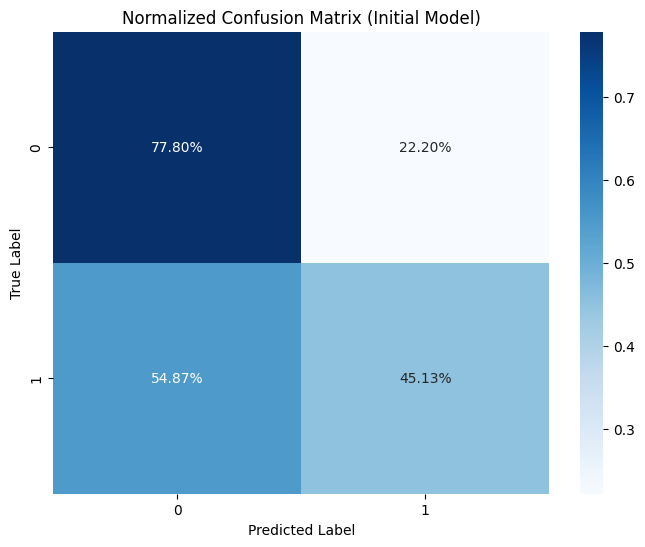

In [16]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
conf_matrix = confusion_matrix(y_test, y_pred, normalize='true')
sns.heatmap(conf_matrix, annot=True, fmt='.2%', cmap='Blues')
plt.title('Normalized Confusion Matrix (Initial Model)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.savefig('confusion_matrix_dt.png') # Save the plot
plt.show() # Display inline
plt.close()

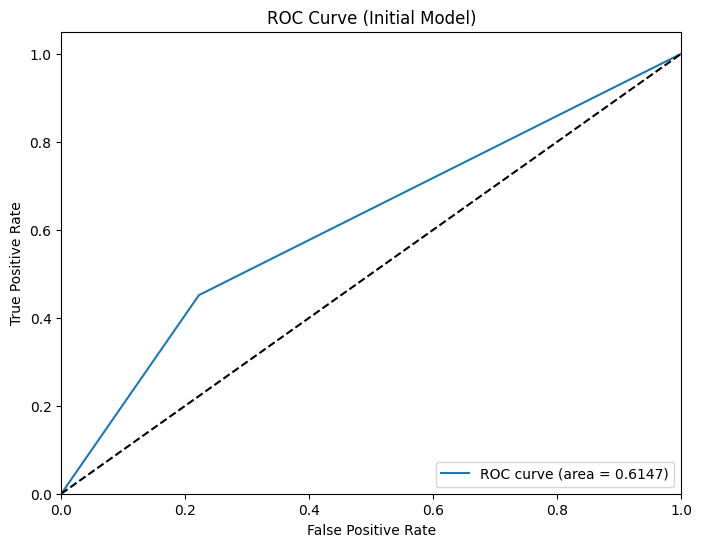

In [17]:
# Plot ROC curve
plt.figure(figsize=(8, 6))
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label='ROC curve (area = {:.4f})'.format(roc_auc_score(y_test, y_prob)))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Initial Model)')
plt.legend(loc="lower right")
plt.savefig('roc_curve_dt.png') # Save the plot
plt.show() # Display inline
plt.close()

## Hyperparameter Tuning

In [18]:
# Hyperparameter tuning
print("Tuning Hyperparameters...")
param_grid = {
    'classifier__max_depth': [None, 5, 10, 15, 20], # Add None for unlimited depth
    'classifier__min_samples_split': [2, 5, 10, 20], # Explore more split options
    'classifier__min_samples_leaf': [1, 2, 4, 8, 16], # Explore more leaf options
    'classifier__criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(
    dt_pipeline, 
    param_grid, 
    cv=5, # 5-fold cross-validation
    scoring='roc_auc', # Optimize for ROC AUC
    n_jobs=-1, # Use all available CPU cores
    verbose=1  # Show progress
)

grid_search.fit(X_train, y_train)

print("Best Parameters found by GridSearchCV:")
print(grid_search.best_params_)
print("Best ROC AUC Score from GridSearchCV: {:.4f}".format(grid_search.best_score_))

Tuning Hyperparameters...
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Best Parameters found by GridSearchCV:
{'classifier__criterion': 'entropy', 'classifier__max_depth': 15, 'classifier__min_samples_leaf': 16, 'classifier__min_samples_split': 2}
Best ROC AUC Score from GridSearchCV: 0.7272


## Evaluate Best Model

In [19]:
# Evaluate the best model found by GridSearch
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)
y_prob_best = best_model.predict_proba(X_test)[:, 1]

print("Best Model Evaluation (after Tuning):")
print("Accuracy: {:.4f}".format(accuracy_score(y_test, y_pred_best)))
print("Precision: {:.4f}".format(precision_score(y_test, y_pred_best)))
print("Recall: {:.4f}".format(recall_score(y_test, y_pred_best)))
print("F1 Score: {:.4f}".format(f1_score(y_test, y_pred_best)))
print("ROC AUC: {:.4f}".format(roc_auc_score(y_test, y_prob_best)))

print("Classification Report for Best Model:")
print(classification_report(y_test, y_pred_best))

Best Model Evaluation (after Tuning):
Accuracy: 0.6724
Precision: 0.4440
Recall: 0.6797
F1 Score: 0.5371
ROC AUC: 0.7424
Classification Report for Best Model:
              precision    recall  f1-score   support

           0       0.84      0.67      0.75      5212
           1       0.44      0.68      0.54      2023

    accuracy                           0.67      7235
   macro avg       0.64      0.67      0.64      7235
weighted avg       0.73      0.67      0.69      7235



## Visualize Best Model Performance

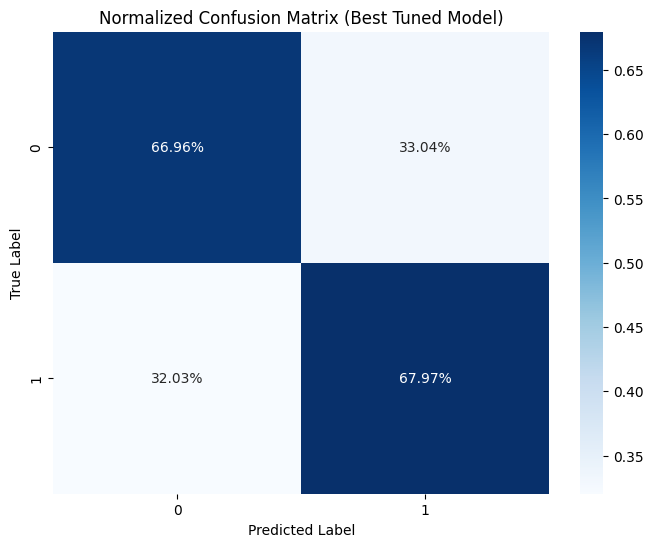

In [20]:
# Plot confusion matrix for best model
plt.figure(figsize=(8, 6))
conf_matrix_best = confusion_matrix(y_test, y_pred_best, normalize='true')
sns.heatmap(conf_matrix_best, annot=True, fmt='.2%', cmap='Blues')
plt.title('Normalized Confusion Matrix (Best Tuned Model)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.savefig('confusion_matrix_dt_best.png') # Save the plot
plt.show() # Display inline
plt.close()

## Visualize Decision Tree Structure

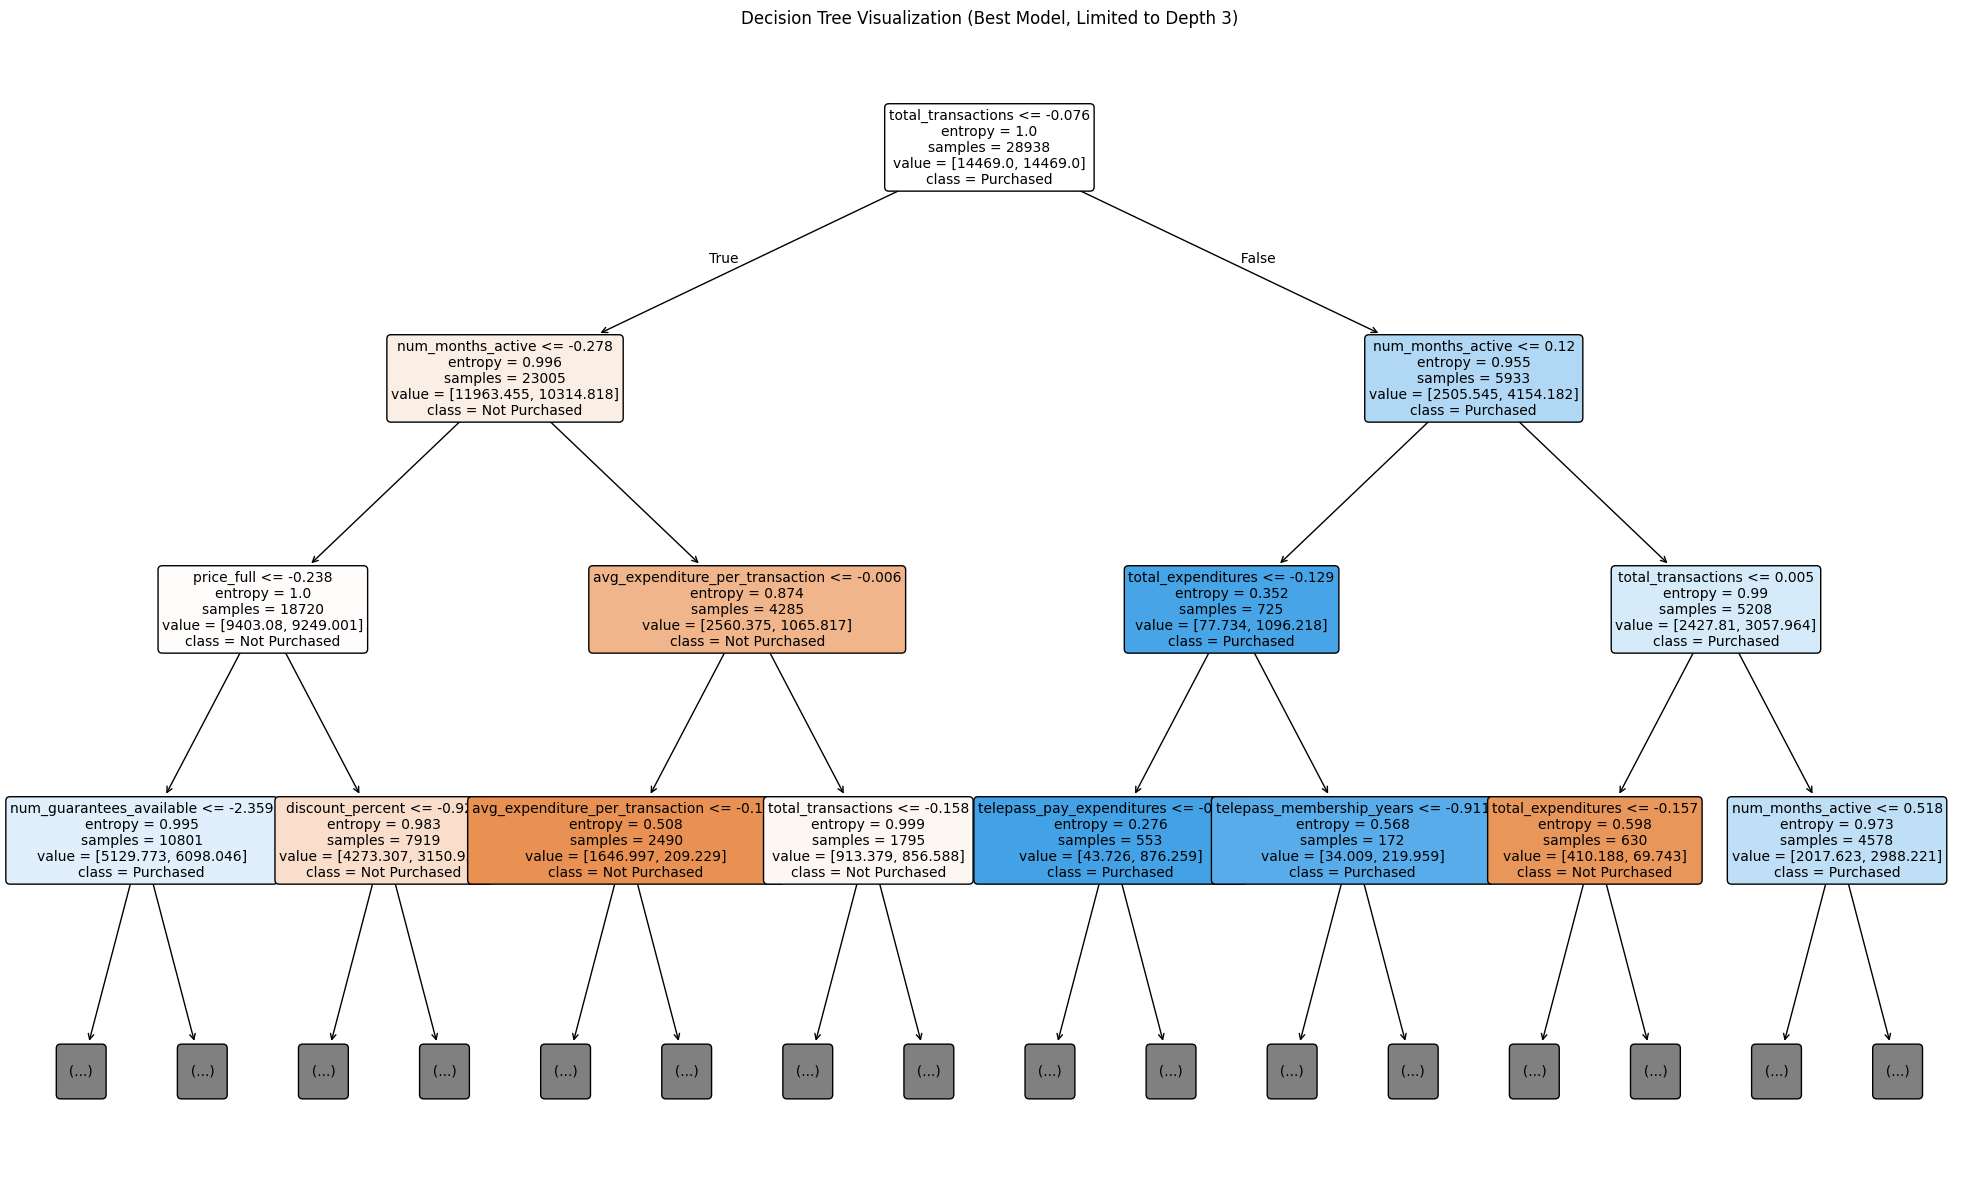

In [21]:
# Plot the decision tree (limited depth for readability)
plt.figure(figsize=(25, 15)) # Increase figure size for potentially complex trees
max_depth_to_plot = 3 # Limit tree depth for visualization clarity
decision_tree = best_model.named_steps['classifier']
preprocessor_step = best_model.named_steps['preprocessor']

# Get feature names after preprocessing
try:
    # Get numerical feature names directly
    num_feature_names = available_numerical
    
    # Get categorical feature names from the OneHotEncoder
    cat_transformer = preprocessor_step.named_transformers_['cat']
    ohe_step = cat_transformer.named_steps['onehot']
    cat_feature_names = ohe_step.get_feature_names_out(available_categorical)
    
    # Combine feature names
    feature_names = num_feature_names + list(cat_feature_names)
    
    # Check if the number of features matches
    n_features_in_tree = decision_tree.n_features_in_
    if len(feature_names) != n_features_in_tree:
        print(f"Warning: Number of generated feature names ({len(feature_names)}) does not match number of features in the tree ({n_features_in_tree}). Adjusting...")
        # Attempt to use a generic list if mismatch occurs, though names will be less informative
        # This might happen if 'remainder=passthrough' picked up unexpected columns or due to an error
        feature_names = [f'feature_{i}' for i in range(n_features_in_tree)]

    # Plot the tree
    plot_tree(
        decision_tree,
        feature_names=feature_names,
        class_names=['Not Purchased', 'Purchased'], # Assuming 0=Not Purchased, 1=Purchased
        filled=True,
        rounded=True,
        max_depth=max_depth_to_plot,
        fontsize=10 # Adjust font size if needed
    )
    plt.title(f'Decision Tree Visualization (Best Model, Limited to Depth {max_depth_to_plot})')
    plt.savefig('decision_tree_visualization.png', dpi=300, bbox_inches='tight')
    plt.show()
    plt.close()
except Exception as e:
    print(f"Error creating decision tree visualization: {e}")
    # Fallback or further debugging might be needed here

## Feature Importance

Top 20 Important Features (Best Model):


,Feature,Importance
0,num_months_active,0.162211
1,total_transactions,0.158379
2,discount_percent,0.116236
3,avg_expenditure_per_transaction,0.089842
4,total_expenditures,0.067591
5,price_full,0.061579
6,car_age,0.052816
7,telepass_membership_years,0.050907
8,num_guarantees_available,0.039637
9,age,0.037786


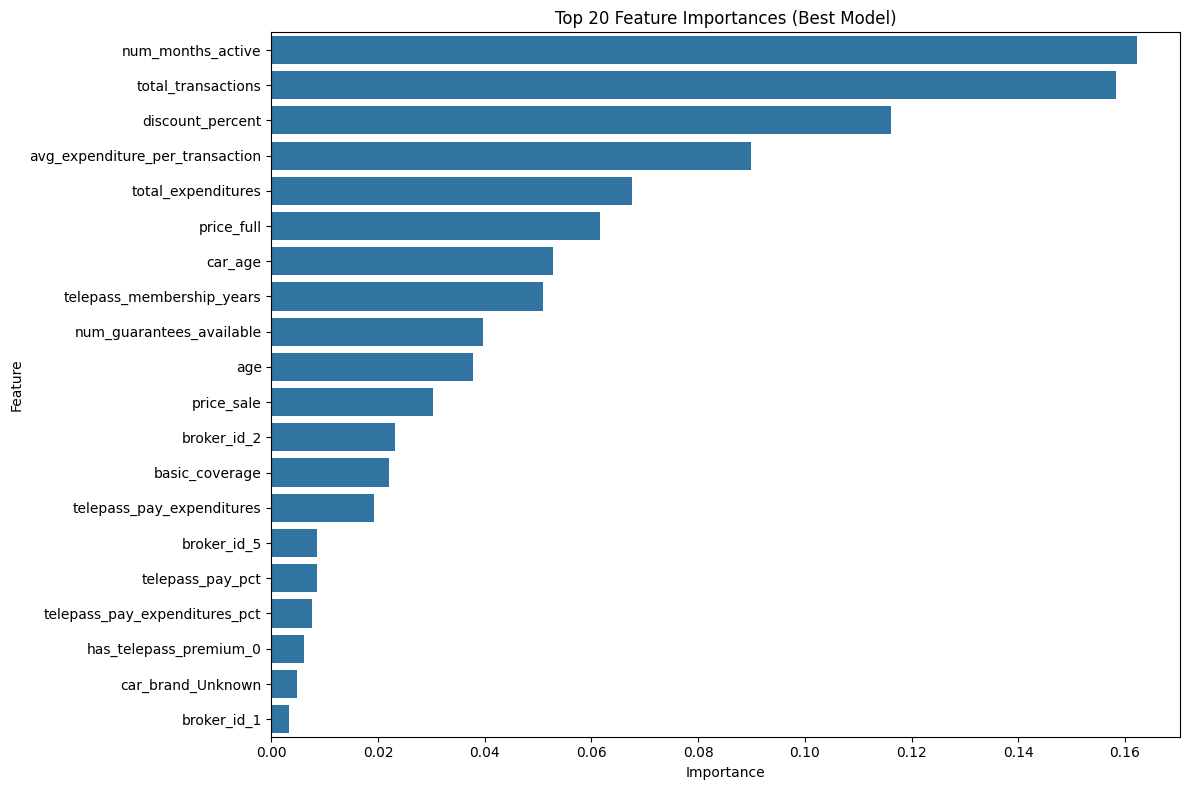

In [22]:
# Feature importance from the best decision tree model
if hasattr(best_model.named_steps['classifier'], 'feature_importances_'):
    # Get feature names after preprocessing (using the same logic as for tree visualization)
    try:
        preprocessor_step = best_model.named_steps['preprocessor']
        num_feature_names = available_numerical
        cat_transformer = preprocessor_step.named_transformers_['cat']
        ohe_step = cat_transformer.named_steps['onehot']
        cat_feature_names = ohe_step.get_feature_names_out(available_categorical)
        feature_names = num_feature_names + list(cat_feature_names)
        
        # Get feature importances
        importances = best_model.named_steps['classifier'].feature_importances_
        
        # Ensure lengths match
        if len(feature_names) == len(importances):
            feature_importance = pd.DataFrame({
                'Feature': feature_names,
                'Importance': importances
            })
            
            # Sort by importance
            feature_importance = feature_importance.sort_values('Importance', ascending=False).reset_index(drop=True)
            
            # Display top 20 features
            print("Top 20 Important Features (Best Model):")
            display(feature_importance.head(20))
            
            # Plot feature importance
            plt.figure(figsize=(12, 8))
            sns.barplot(x='Importance', y='Feature', data=feature_importance.head(20))
            plt.title('Top 20 Feature Importances (Best Model)')
            plt.tight_layout()
            plt.savefig('feature_importance_dt.png')
            plt.show()
            plt.close()
        else:
             print(f"Error: Number of feature names ({len(feature_names)}) does not match number of importances ({len(importances)}).")
   
    except Exception as e:
        print(f"Error creating feature importance plot: {e}")
else:
    print("The classifier does not have 'feature_importances_' attribute.")

## Model Summary

In [23]:
print("Decision Tree Model Analysis Completed.")
print("Model Strengths:")
print("1. Non-linear Relationships: Decision Trees can capture non-linear patterns in the data.")
print("2. Feature Interactions: Automatically captures interactions between features.")
print("3. Interpretability: Tree structure (when shallow) provides visual representation of decision rules.")
print("4. Feature Importance: Clear ranking of feature importance based on node splits.")
print("5. No Assumptions: Does not make strong assumptions about the distribution of the data.")

print("Model Weaknesses:")
print("1. Overfitting: Decision Trees can easily overfit the training data if not properly constrained (pruned or depth-limited).")
print("2. Instability: Small changes in data can lead to significantly different tree structures.")
print("3. Bias: Can be biased toward features with more levels (especially for categorical variables if not handled carefully).")
print("4. Axis-Aligned Splits: Decision boundaries are always parallel to the feature axes, which might not be optimal for some data patterns.")

Decision Tree Model Analysis Completed.
Model Strengths:
1. Non-linear Relationships: Decision Trees can capture non-linear patterns in the data.
2. Feature Interactions: Automatically captures interactions between features.
3. Interpretability: Tree structure (when shallow) provides visual representation of decision rules.
4. Feature Importance: Clear ranking of feature importance based on node splits.
5. No Assumptions: Does not make strong assumptions about the distribution of the data.
Model Weaknesses:
1. Overfitting: Decision Trees can easily overfit the training data if not properly constrained (pruned or depth-limited).
2. Instability: Small changes in data can lead to significantly different tree structures.
3. Bias: Can be biased toward features with more levels (especially for categorical variables if not handled carefully).
4. Axis-Aligned Splits: Decision boundaries are always parallel to the feature axes, which might not be optimal for some data patterns.
